In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import stats
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
comp = pd.read_csv("hubspot-crm-exports-all-companies-2020-10-21.csv")
# payments = pd.read_csv('hubspot-crm-exports-all-companies-2020-10-24.csv')
# contacts = pd.read_excel('hubspot-crm-exports-all-contacts-2021-06-03 (For Students).xlsx', encoding = "ISO-8859-1")
# calls = pd.read_excel('hubspot-crm-exports-recorded-calls-2021-06-02 (For Students).xlsx', encoding = "ISO-8859-1")
# payments_trimmed = pd.read_excel('payments_trimmed.xlsx',sheet_name='Sheet1',encoding = "ISO-8859-1")
# testing = pd.read_excel('payments_trimmed.xlsx',sheet_name='Sheet2',encoding = "ISO-8859-1")

## add the standardized product name
# payments['Product'] = payments_trimmed['Product']
## drop the testing trasactions

In [3]:
comp.head()

,Company ID,Target Account,Last Modified Date,Lead Status,Total Revenue,Postal Code,Twitter Followers,first_conversion_date_timestamp_earliest_value_61f58f2c,Company Domain Name,Last Touch Converting Campaign,...,hs_analytics_source_data_2_timestamp_earliest_value_9b2f9400,Street Address 2,Is Public,hs_analytics_last_touch_converting_campaign_timestamp_latest_value_81a64e30,User IDs of all owners,Avatar FileManager key,Number of open deals,Updated by user ID,Associated Company ID,Associated Company
0,4473802587,NaN,2020-09-15 12:01,NaN,NaN,90210,NaN,NaN,heytutor.com,NaN,...,NaN,UNIT 202,False,NaN,11908782.0,NaN,NaN,Cole Whritenour,NaN,NaN
1,4477249150,NaN,2020-10-20 13:50,NaN,NaN,60611,NaN,NaN,4dhealthware.com,NaN,...,NaN,NaN,False,NaN,11908785.0,NaN,NaN,Neel Mehta,NaN,NaN
2,4477249204,NaN,2020-10-20 13:50,NaN,NaN,10001,NaN,NaN,zipdrug.com,NaN,...,NaN,NaN,False,NaN,11908785.0,NaN,NaN,Neel Mehta,NaN,NaN
3,4477249367,NaN,2020-10-20 13:50,NaN,NaN,30308,NaN,NaN,agoraservices.us,NaN,...,NaN,NaN,False,NaN,11908785.0,NaN,NaN,Neel Mehta,NaN,NaN
4,4477638279,NaN,2020-10-20 13:50,NaN,NaN,80301,NaN,NaN,stateless.net,NaN,...,NaN,NaN,NaN,NaN,11908785.0,NaN,NaN,Neel Mehta,NaN,NaN


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Columns: 119 entries, Company ID to Associated Company
dtypes: float64(78), int64(3), object(38)
memory usage: 694.6+ KB


In [5]:
checkna = dict(comp.isna().sum().sort_values(ascending = False))
checkna

{'Source of last booking in meetings tool': 747,
 'Last Open Task Date': 747,
 'Google Plus Page': 747,
 'hs_analytics_num_page_views_cardinality_sum_e46e85b0': 747,
 'First Deal Created Date': 747,
 'recent_conversion_event_name_timestamp_latest_value_66c820bf': 747,
 'Medium of last booking in meetings tool': 747,
 'hs_analytics_num_visits_cardinality_sum_53d952a6': 747,
 'Time Last Seen': 747,
 'hs_analytics_first_touch_converting_campaign_timestamp_earliest_value_4757fe10': 747,
 'Date of last meeting booked in meetings tool': 747,
 'hs_predictivecontactscore_v2_next_max_max_d4e58c1e': 747,
 'Latest meeting activity': 747,
 'Merged object IDs': 747,
 'Additional Domains': 747,
 'Target Account Recommendation Snooze Time': 747,
 'Total open deal value': 747,
 'All accessible team ids': 747,
 'Target Account Recommendation State': 747,
 'last sales activity date old': 747,
 'Last Sales Activity Date': 747,
 'first_contact_createdate_timestamp_earliest_value_78b50eea': 747,
 'closedat

In [6]:
newcheckna = {key: value for (key, value) in checkna.items() if value >= 650 }
list(newcheckna.keys())

['Source of last booking in meetings tool',
 'Last Open Task Date',
 'Google Plus Page',
 'hs_analytics_num_page_views_cardinality_sum_e46e85b0',
 'First Deal Created Date',
 'recent_conversion_event_name_timestamp_latest_value_66c820bf',
 'Medium of last booking in meetings tool',
 'hs_analytics_num_visits_cardinality_sum_53d952a6',
 'Time Last Seen',
 'hs_analytics_first_touch_converting_campaign_timestamp_earliest_value_4757fe10',
 'Date of last meeting booked in meetings tool',
 'hs_predictivecontactscore_v2_next_max_max_d4e58c1e',
 'Latest meeting activity',
 'Merged object IDs',
 'Additional Domains',
 'Target Account Recommendation Snooze Time',
 'Total open deal value',
 'All accessible team ids',
 'Target Account Recommendation State',
 'last sales activity date old',
 'Last Sales Activity Date',
 'first_contact_createdate_timestamp_earliest_value_78b50eea',
 'closedate_timestamp_earliest_value_a2a17e6e',
 'About Us',
 'Twitter Bio',
 'Next Activity Date',
 'Target Account',
 

In [7]:
comp = comp.drop(columns = list(newcheckna.keys()))

In [8]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company ID                  747 non-null    int64  
 1   Last Modified Date          747 non-null    object 
 2   Postal Code                 589 non-null    object 
 3   Company Domain Name         693 non-null    object 
 4   Number of Employees         597 non-null    float64
 5   Number of times contacted   450 non-null    float64
 6   Number of Sales Activities  450 non-null    float64
 7   Target Account Probability  735 non-null    float64
 8   Facebook Company Page       388 non-null    object 
 9   Create Date                 747 non-null    object 
 10  LinkedIn Bio                594 non-null    object 
 11  City                        660 non-null    object 
 12  Name                        747 non-null    object 
 13  Number of child companies   747 non

In [9]:
comp['User IDs of all owners'] = comp['User IDs of all owners'].astype('str')
comp['User IDs of all owners'].unique()

array(['11908782.0', '11908785.0', 'nan', '11908784.0', '6846587.0',
       '11940760.0'], dtype=object)

## Data Quality Summary Tables

In [10]:
## create a function to summarize the data quality
def dataquality_numeric(raw):
    print(f'Dataset Shape:{raw.shape}')
    numeric_col = raw.select_dtypes(include=['int64','float64'])   
    summary = pd.DataFrame(numeric_col.dtypes,columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]  
    summary['# of Records'] = numeric_col.count().values
    summary['% populated'] = (((len(raw)-numeric_col.isnull().sum().values)/len(raw))*100).round(2)
    summary['# Zeros'] = numeric_col[numeric_col ==0].count().values
    summary['Uniques'] = numeric_col.nunique().values
    summary['Mean'] = numeric_col.mean().values
    summary['Maximum'] = numeric_col.max().values
    summary['Minimum'] = numeric_col.min().values
    summary['Standard Deviation'] = numeric_col.std().values
      
    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(numeric_col[name].value_counts(normalize = True),base = 2),2)
    return summary

## create a function to summarize the data quality for categorical variables
def dataquality_categorical(raw):
    print(f'Dataset Shape:{raw.shape}')
    categorical_col = raw.select_dtypes(include = ['object','category'])
    #print(categorical_col)
    summary = pd.DataFrame(categorical_col.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of Records'] = categorical_col.count().values
    summary['% populated'] = (((len(raw) - categorical_col.isnull().sum().values)/(len(raw)))*100).round(2)
    summary['# NA'] = categorical_col.isnull().sum().values \
    + categorical_col[categorical_col =='-1'].count().values
    summary['# Unique_Values'] = categorical_col.nunique().values
    summary['First_Value'] = categorical_col.loc[0].values
    summary['Second_Value'] = categorical_col.loc[1].values
    summary['Third_Value'] = categorical_col.loc[2].values
    count_value = pd.DataFrame(index = categorical_col.columns,columns = ['count'])
    most_common = pd.DataFrame(index = categorical_col.columns,columns = ['MostCommon'])
    #print(count_value)
    #print(most_common)
    for col in categorical_col.columns:
        count_value.loc[col,'count'] = categorical_col[col].value_counts(normalize = True).values[0]*100
        most_common.loc[col,'MostCommon'] = categorical_col[col].mode().values 
    summary['% Most_Common_Field'] = count_value['count'].values.astype(float).round(2)
    summary['Most_Common_Field'] = most_common['MostCommon'].values

    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
          summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(categorical_col[name].value_counts(normalize = True),base = 2),2)
    return summary
def dataquality_datetime(raw):
    print(f'Dataset Shape:{raw.shape}')
    raw['Last Modified Date'] = pd.to_datetime(raw['Last Modified Date'])
    datetime_col = raw.select_dtypes(include = ["datetime64[ns]"])
    summary = pd.DataFrame(datetime_col.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of Records'] = datetime_col.count().values
    summary['% populated'] = (((len(raw) - datetime_col.isnull().sum().values)/(len(raw)))*100).round(2)
    summary['# NA'] = datetime_col.isnull().sum().values
    summary['# Unique_Values'] = datetime_col.nunique().values
    summary['Maximum'] = datetime_col.max().values
    summary['Minimum'] = datetime_col.min().values

    count_value = pd.DataFrame(columns = ['count'])
    most_common = pd.DataFrame(columns = ['Most Common'])
    for col in datetime_col.columns:
        count_value.loc[col,'count'] = datetime_col[col].value_counts(normalize = True).values[0]*100
        most_common.loc[col,'Most Common'] = datetime_col[col].mode().values
    summary['%Most_Common_Field'] = count_value['count'].values.astype(float).round(2)
    summary['Most_Common_Field'] = most_common['Most Common'].values

    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
          summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(datetime_col[name].value_counts(normalize = True),base = 2),2)
    return summary

In [11]:
numeric_DQR = dataquality_numeric(comp)
numeric_DQR

Dataset Shape:(747, 40)


,Name,dtypes,# of Records,% populated,# Zeros,Uniques,Mean,Maximum,Minimum,Standard Deviation,Entropy
0,Company ID,int64,747,100.00,0,747,4.541401e+09,4.674764e+09,4.473803e+09,4.808978e+07,9.54
1,Number of Employees,float64,597,79.92,0,6,4.755444e+01,1.000000e+03,1.000000e+01,7.153142e+01,1.87
2,Number of times contacted,float64,450,60.24,42,8,1.126667e+00,7.000000e+00,0.000000e+00,7.488373e-01,1.22
3,Number of Sales Activities,float64,450,60.24,0,8,1.380000e+00,1.300000e+01,1.000000e+00,1.169413e+00,1.03
4,Target Account Probability,float64,735,98.39,0,9,4.140918e-01,6.659648e-01,3.862512e-01,3.081243e-02,1.05
5,Number of child companies,int64,747,100.00,746,2,1.338688e-03,1.000000e+00,0.000000e+00,3.658809e-02,0.01
6,Associated Contacts,int64,747,100.00,650,4,1.499331e-01,3.000000e+00,0.000000e+00,4.193821e-01,0.64
7,All owner ids,float64,743,99.46,0,5,4.917539e+07,5.098241e+07,3.611617e+07,4.759064e+06,2.14
8,Year Founded,float64,564,75.50,0,28,2.014215e+03,2.019000e+03,1.975000e+03,4.262489e+00,3.41
9,Annual Revenue,float64,535,71.62,0,4,8.448598e+06,1.000000e+08,1.000000e+06,1.191829e+07,1.28


In [12]:
categorical_DQR = dataquality_categorical(comp)
categorical_DQR

Dataset Shape:(747, 40)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,First_Value,Second_Value,Third_Value,% Most_Common_Field,Most_Common_Field,Entropy
0,Last Modified Date,object,747,100.00,0,345,2020-09-15 12:01,2020-10-20 13:50,2020-10-20 13:50,12.99,[2020-10-20 13:49],6.85
1,Postal Code,object,589,78.85,158,401,90210,60611,10001,1.87,[10013],8.34
2,Company Domain Name,object,693,92.77,54,678,heytutor.com,4dhealthware.com,zipdrug.com,0.43,[cerberusinteractive.com],9.39
3,Facebook Company Page,object,388,51.94,359,376,https://facebook.com/heytutor,https://www.facebook.com/4DHealthware,https://facebook.com/zipdrug,0.52,"[https://facebook.com/crunchbase, https://face...",8.54
4,Create Date,object,747,100.00,0,374,2020-09-14 14:05,2020-09-15 10:32,2020-09-15 10:34,11.24,[2020-10-09 19:25],7.62
5,LinkedIn Bio,object,594,79.52,153,580,We offer top-tier private tutoring services in...,"MAKE HEALTH A MATTER OF CHOICE, NOT CHANCE We'...",NaN,0.51,[Cerberus Interactive is a location-based mobi...,9.17
6,City,object,660,88.35,87,231,Los Angeles,Chicago,New York,15.15,[New York],6.45
7,Name,object,747,100.00,0,729,HeyTutor,4D Healthware,Zipdrug,0.27,"[Better Time Inc, Brandlive, Cerberus Interact...",9.50
8,Phone Number,object,489,65.46,258,472,888-669-9811,224-633-9472,+1 844-947-3784,1.02,[ +1 800-778-7879],8.85
9,Company owner,object,743,99.46,4,5,Cole Whritenour,Neel Mehta,Neel Mehta,34.19,[Neel Mehta],2.14


In [13]:
datetime_DQR = dataquality_datetime(comp)
datetime_DQR

Dataset Shape:(747, 40)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,Maximum,Minimum,%Most_Common_Field,Most_Common_Field,Entropy
0,Last Modified Date,datetime64[ns],747,100.0,0,345,2020-10-21 15:11:00,2020-09-15 11:17:00,12.99,[2020-10-20T13:49:00.000000000],6.85


### Non-NA Columns in comp

* Last Modified Date
* Processing mode
* Pipeline
* Forecast category
* Associated Contact IDs
* Associated Contacts


## Data Cleaning 

### tasks:

**Standardize product name**
- All transactions whose deal name or product name has “ET”, “ETE”, or “Expert Trader” will be marked as ET. 

- All transactions whose deal name or product name has “Mish's Ultimate Trading Program” or “Market Gauge” will be marked as ET. 

- All transactions whose deal name or product name has “Premium Trading Room” or “PTR” will be marked as WSWP. 

- All transactions whose deal name or product name has “MZM” or “Money Zone Method” will be marked as MZM. 
--------

**Test transactions**
- All transactions with customer name contains 'test', or Safaa Abdulhadi should be labeled as Test
- All transactions whose deal name or product name has “test” or “integratehq” will be marked as Test. 
- All transactions whose amount is between $7 and $99 will be marked as MZM. 
- All transactions whose amount is smaller than $7 will be marked as Test. 
standardize sales rep names
- Any else will be marked as unknown. 


## Univariate Plots

In [14]:
def separate_col(df):
    categorical_cols = df.select_dtypes(include=['object'])
    numeric_cols = df.select_dtypes(include=['float64','int64'])
    datetime_cols = df.select_dtypes(include=['datetime64[ns]'])
    return categorical_cols,numeric_cols,datetime_cols
    
def plotdist(df):
    for col in df.columns:
        n_unique = df[col].nunique()
        plt.figure()
        df[col].value_counts()[:min(n_unique,20)].sort_values(ascending = False).plot(kind='bar')
        plt.title(f'Distribution of {col}',fontsize=18)
        plt.xlabel(col,fontsize=14)
        plt.ylabel('Count',fontsize=14)
        plt.grid()
        plt.show()
        print(col)
    return plt.show()

def plothist(df):
    for col in df.columns:
        plt.figure()
        plt.hist(df[col],bins = 80)
        plt.title(f'Histogram of {col}',fontsize=18)
        plt.xlabel(f'{col}',fontsize=14)
        plt.ylabel('Count',fontsize=14)
        plt.grid()
    return plt.show()   

In [15]:
categorical_cols,numeric_cols,datetime_cols = separate_col(comp)

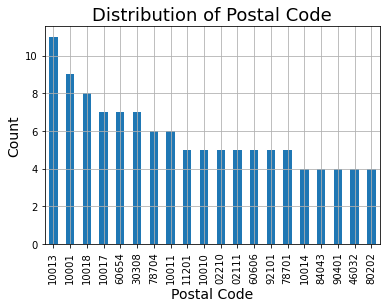

Postal Code


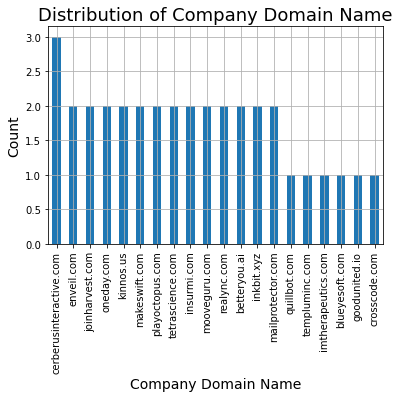

Company Domain Name


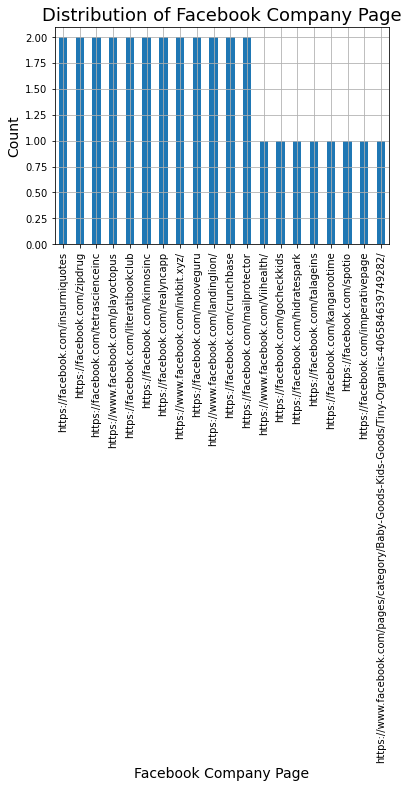

Facebook Company Page


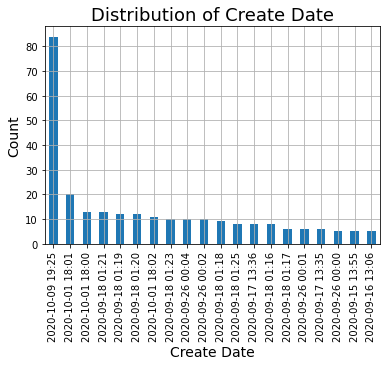

Create Date


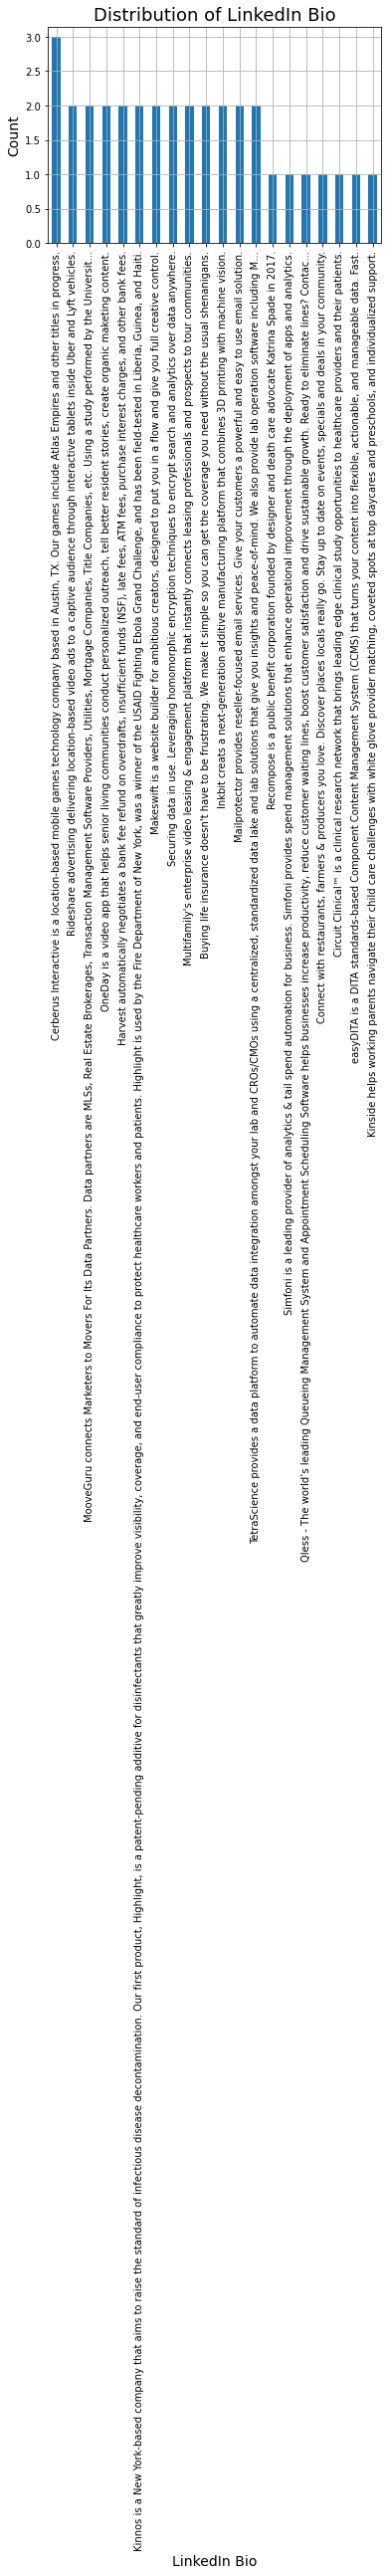

LinkedIn Bio


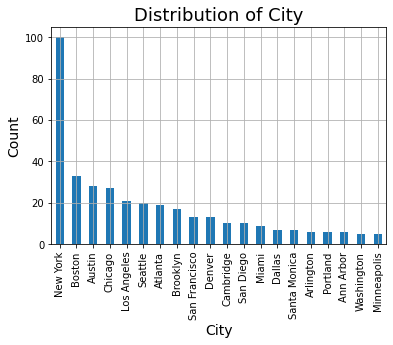

City


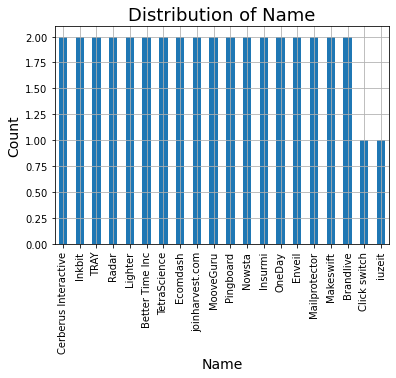

Name


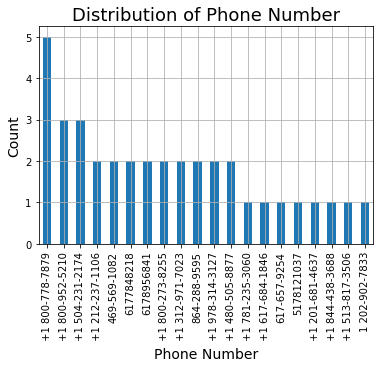

Phone Number


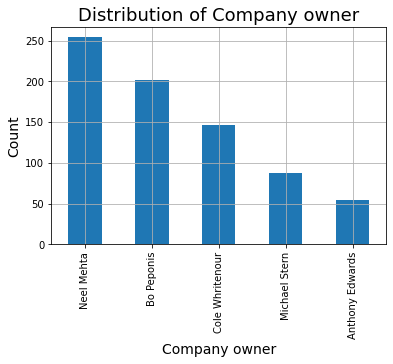

Company owner


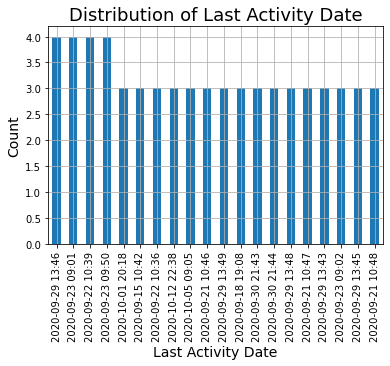

Last Activity Date


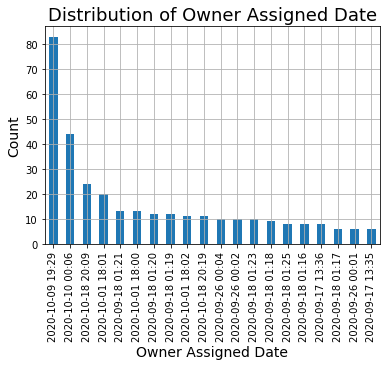

Owner Assigned Date


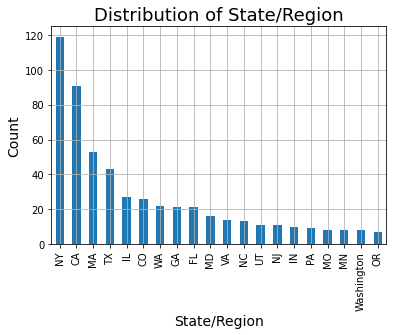

State/Region


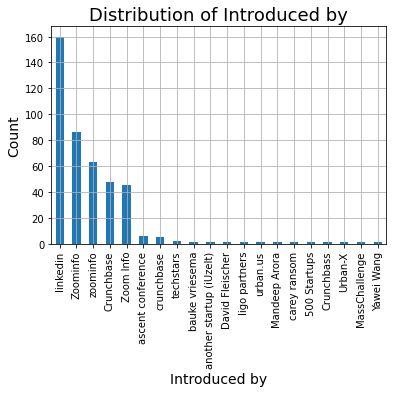

Introduced by


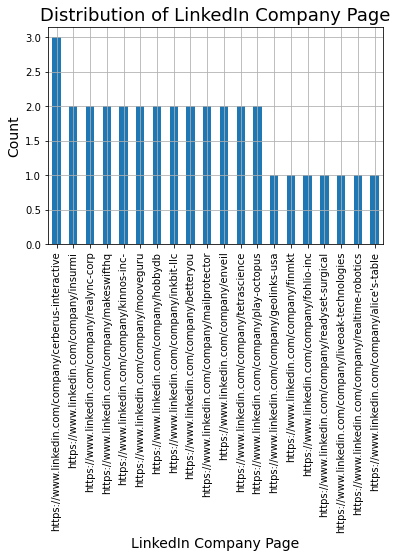

LinkedIn Company Page


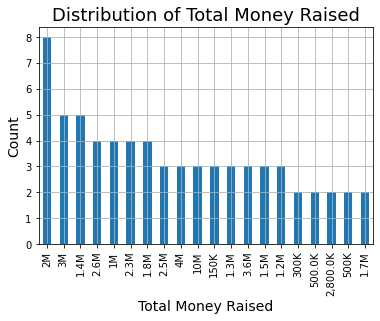

Total Money Raised


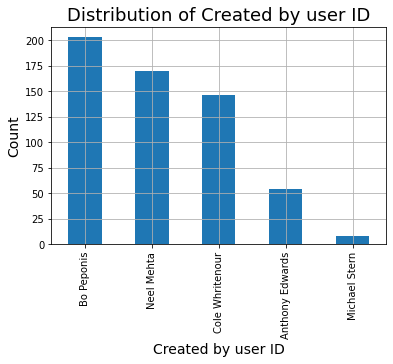

Created by user ID


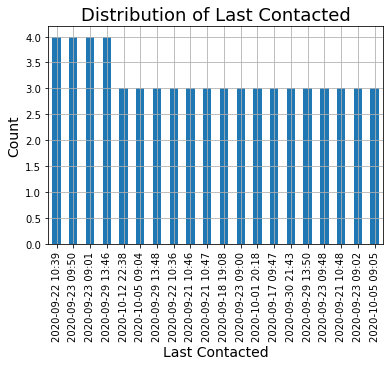

Last Contacted


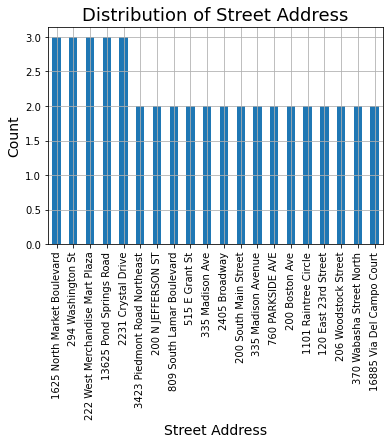

Street Address


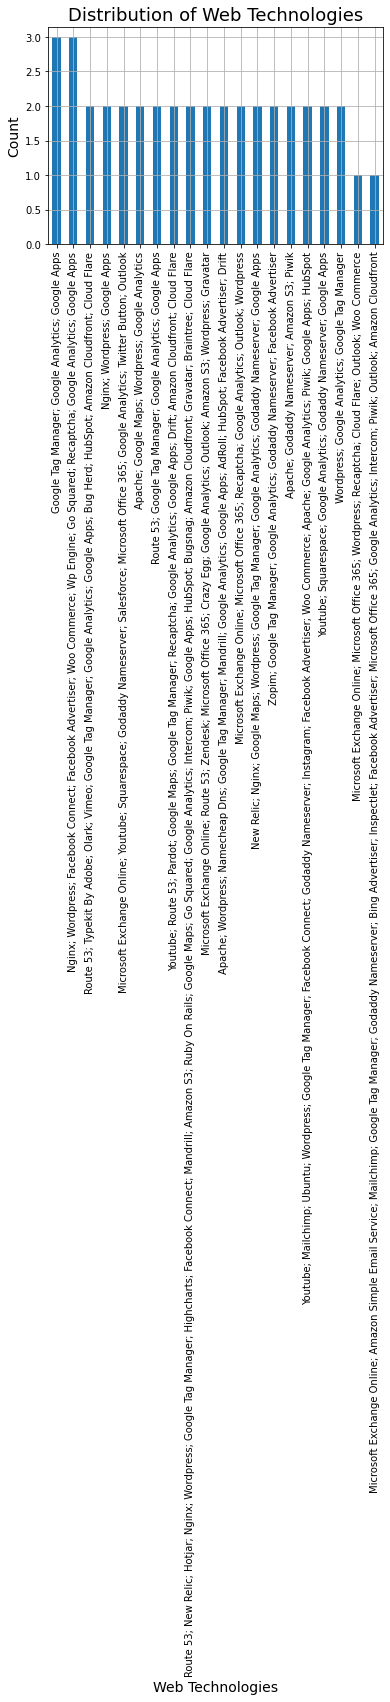

Web Technologies


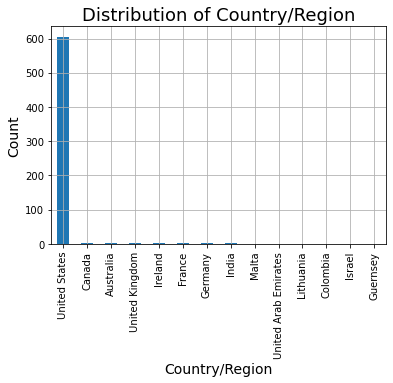

Country/Region


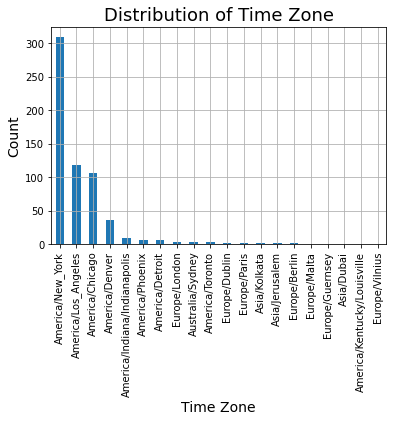

Time Zone


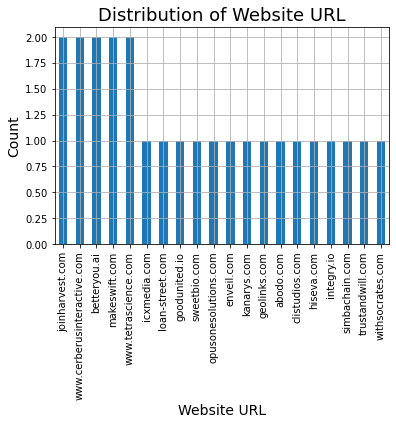

Website URL


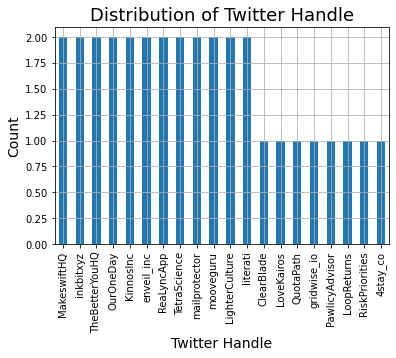

Twitter Handle


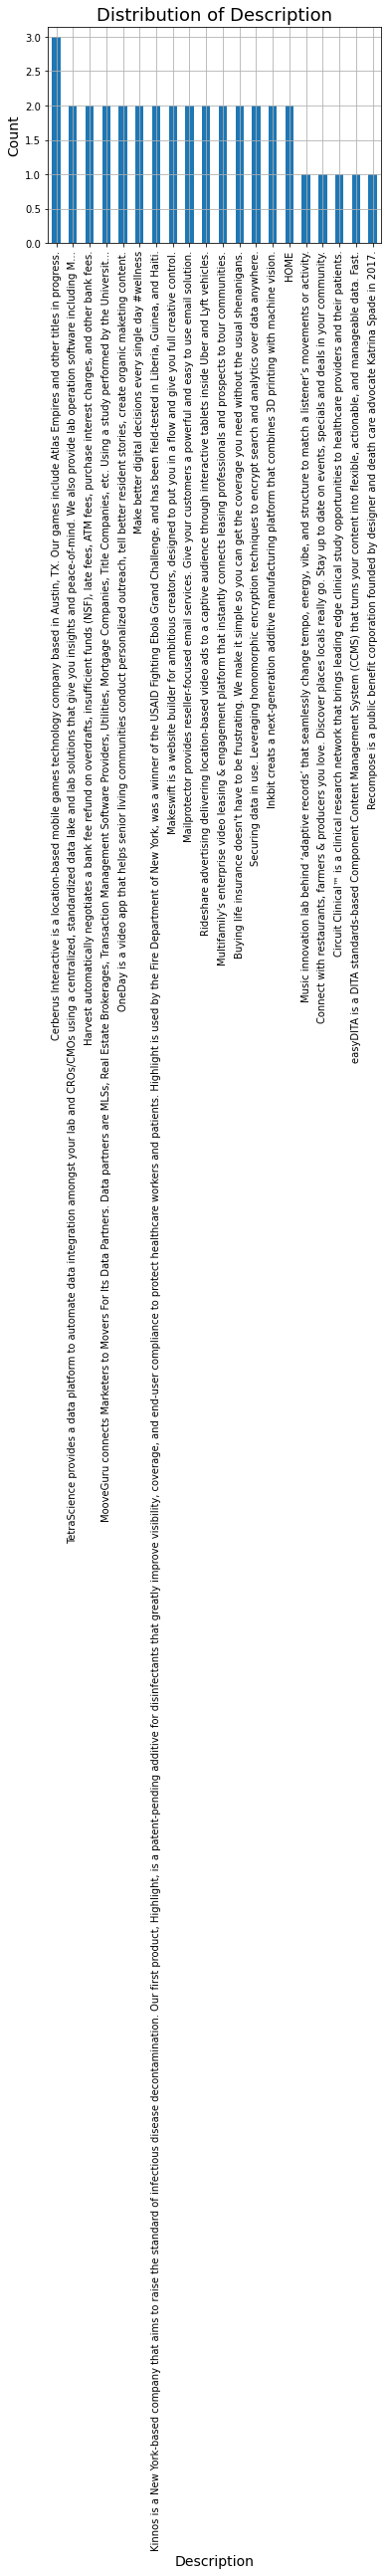

Description


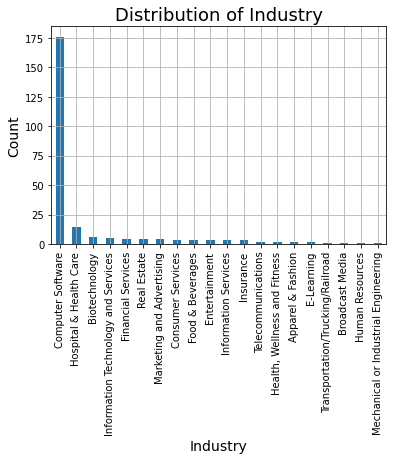

Industry


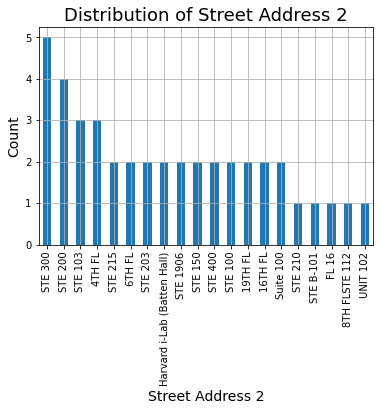

Street Address 2


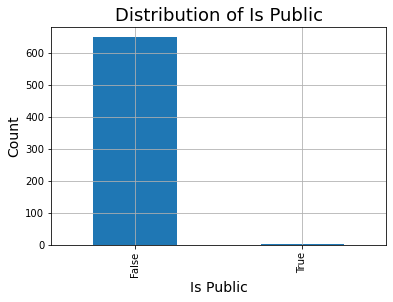

Is Public


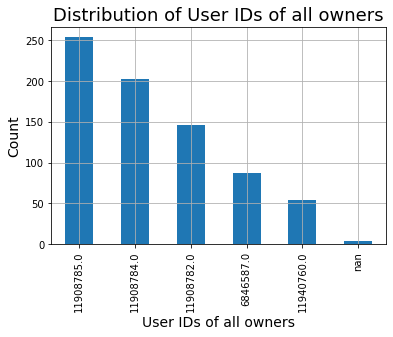

User IDs of all owners


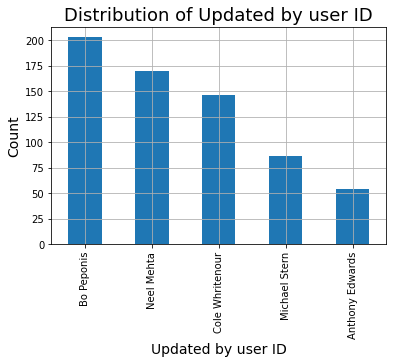

Updated by user ID


In [16]:
plotdist(categorical_cols)

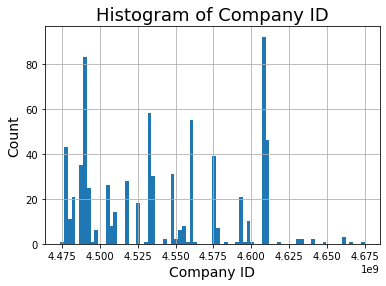

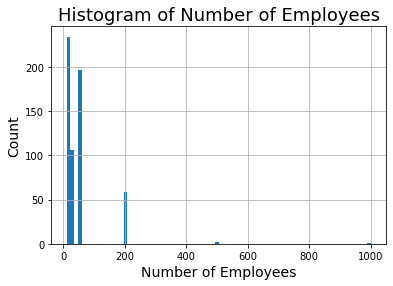

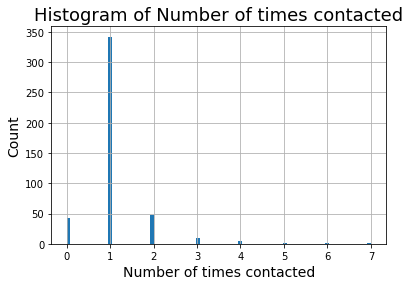

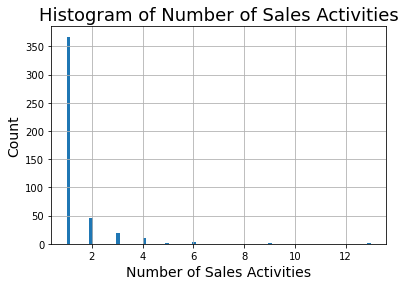

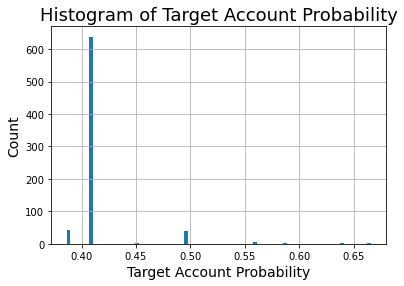

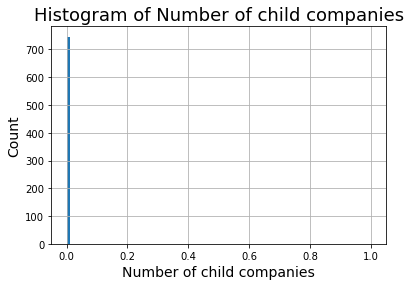

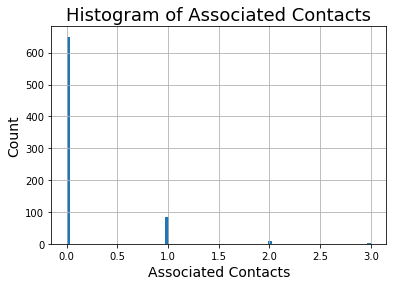

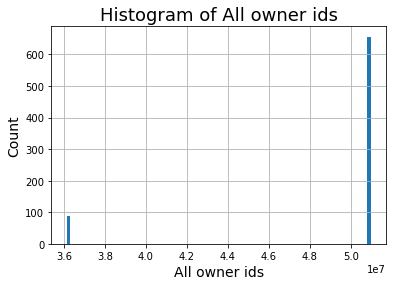

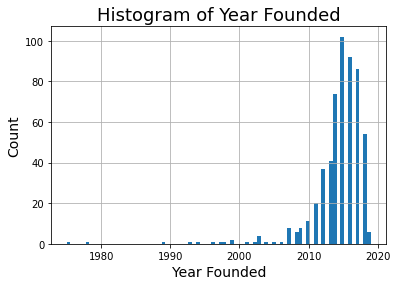

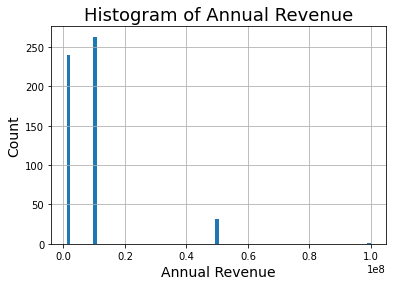

In [17]:
plothist(numeric_cols)

## Multivariate Plots

In [18]:
def multivariate_plot(df, groupby, var):
    df.groupby(by = groupby)[var].sum().sort_values(ascending = False)\
        .head(20).plot(kind = 'bar')
    plt.grid()
    plt.title(f'Total {var} by {groupby}',fontsize=18)
    plt.xlabel(f'{groupby}',fontsize=14)
    plt.ylabel(f'{var}',fontsize=14)
    return plt.show()

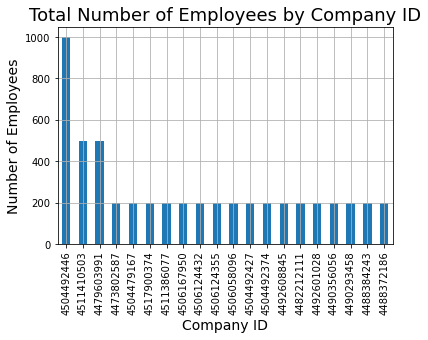

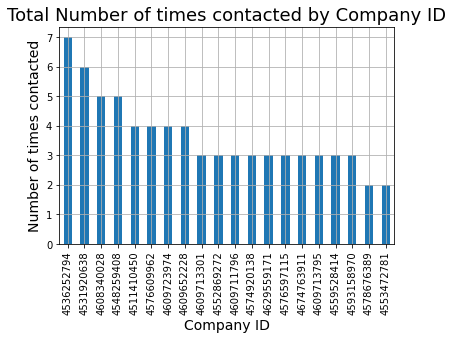

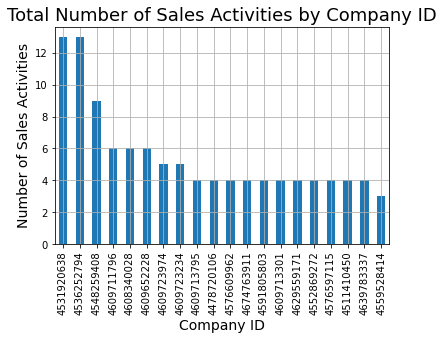

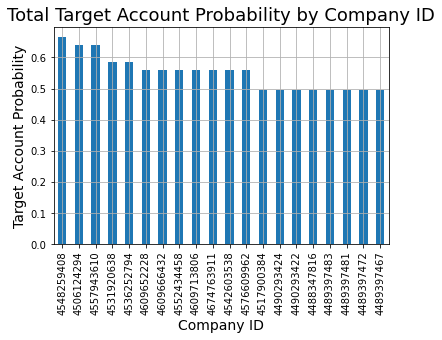

In [19]:
temp_cols = ['Number of Employees', 'Number of times contacted', 'Number of Sales Activities', 'Target Account Probability']
# Associated ID
for var in temp_cols:
    multivariate_plot(df=comp, groupby='Company ID', var=var)

> Safaa Abdulhadi 417801
## customer account close view
### Product name

In [18]:
testing.head()

,Unnamed: 0,TESTING Contacts
0,NaN,Barb Test12
1,NaN,test_3payments@integratehq.com
2,NaN,test_4payments@integratehq.com
3,NaN,Tram Pham
4,NaN,student_renewal_viet_course@integratehq.com


In [19]:
testing_contacts = list(testing['TESTING Contacts'])
comp = comp[~comp['Associated Contacts'].isin(testing_contacts)]

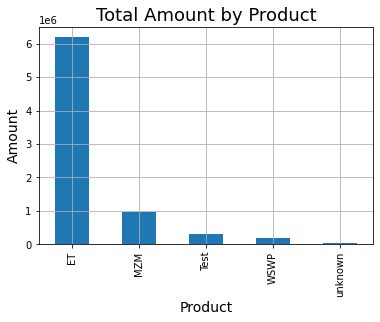

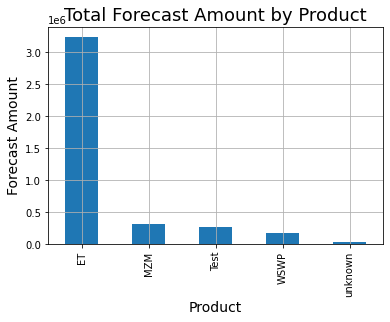

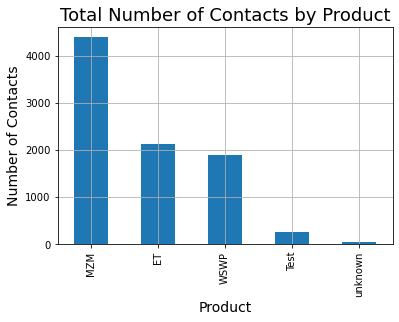

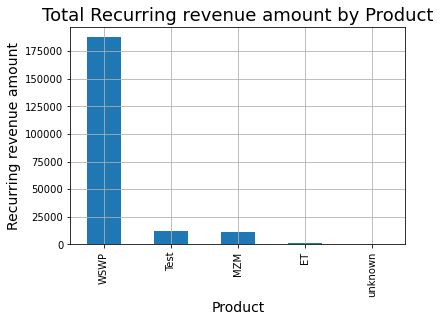

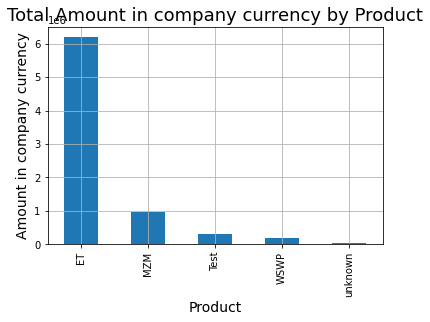

In [27]:
groupby = 'Product'
df = comp
for var in temp_cols:
    multivariate_plot(df, groupby, var)

In [28]:
comp.columns

Index(['Deal ID', 'Mode', 'State of Residence', 'Last Modified Date',
       'Processing mode', 'Recurring revenue Product Code', 'Pipeline',
       'Forecast Probability', 'Close Date', 'Deal Type',
       'Number of times contacted', 'Number of Sales Activities',
       'Payment Status', 'Recurring revenue deal type', 'Original Source Type',
       'Quantity', 'Forecast Amount', 'Order ID', 'Tax Amount', 'Create Date',
       'Sales Rep', 'Processed date', 'Order ID.1', 'Currency', 'Deal Owner',
       'Last Activity Date', 'Owner Assigned Date', 'Payment Type',
       'Order Value', 'Subscription Sync Issues', 'Deal Stage',
       'Number of Contacts', 'Original Source Data 1',
       'Recurring revenue inactive reason', 'Original Source Data 2',
       'Last Contacted', 'Refund Date', 'HubSpot Team', 'Deal Name',
       'Subscription Frequency', 'Payment Method', 'Amount', 'Product Name',
       'Source', 'Product Name.1', 'Payment Processor',
       'Recurring revenue inactive dat

### Sales Rep

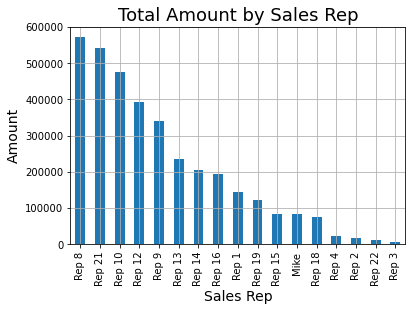

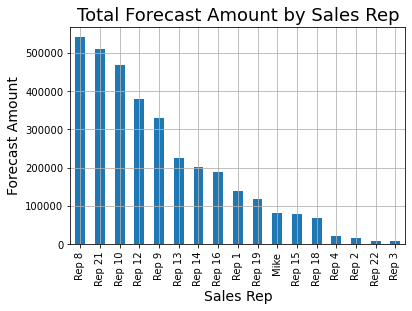

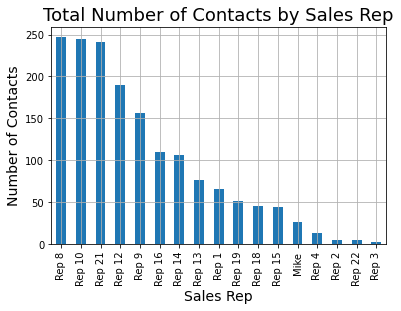

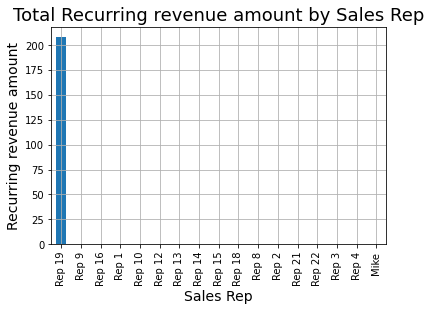

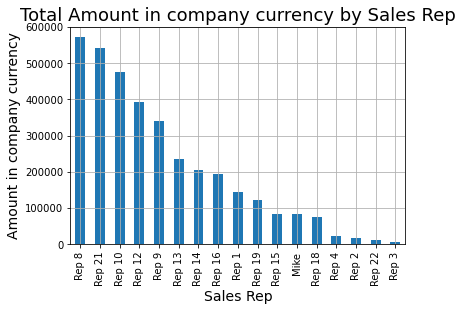

In [29]:
groupby = 'Sales Rep'
df = comp
for var in temp_cols:
    multivariate_plot(df, groupby, var)

In [31]:
c1289501 = comp[comp['Associated Contact IDs'] == '1289501']
c1289501[['Recurring revenue Product Code','Product Name.1','Create Date','Recurring revenue inactive date','Amount']]

,Recurring revenue Product Code,Product Name.1,Create Date,Recurring revenue inactive date,Amount
4242,NaN,Money Zone Method - $97 (#2910204),2020-09-03 21:45:00,NaT,97.0
4454,wswp,WSW Premium - $100/mo,2021-06-01 03:59:00,NaT,100.0
5110,wswp,WSW Premium - $100/mo,2021-04-02 01:57:00,2021-05-01 17:00:00,100.0
5434,wswp,WSW Premium - $100/mo,2021-03-03 00:49:00,2021-03-31 17:00:00,100.0
5907,wswp,WSW Premium - $100/mo (#2916832),2021-01-02 00:46:00,2021-02-01 16:00:00,100.0
6055,wswp,WSW Premium - $100/mo (#2916832),2020-12-03 00:50:00,2020-12-31 16:00:00,100.0
6181,wswp,WSW Premium - $100/mo (#2916832),2020-11-03 00:46:00,2020-12-01 16:00:00,100.0
6287,wswp,WSW Premium - $100/mo (#2916832),2020-10-04 01:51:00,2020-11-01 16:00:00,100.0
6565,wswp,WSW Premium - $100/mo (#2916832),2020-09-03 21:50:00,2020-10-02 17:00:00,100.0


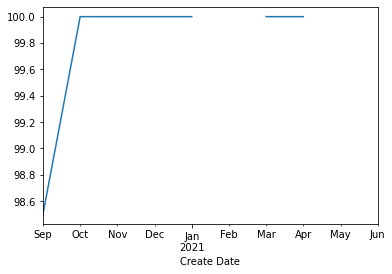

In [32]:
c1289501.resample('M',on = 'Create Date')['Amount'].mean().plot()

## Churn Analysis
### Churn rate for recurring products
#### Label all the exsiting Churned Customers at 2021-06
If a customers purchased a recurring product, and the last payment was created before May 1st 2021, consider it as churned. 
If a customer never purchased a recurring product, consider it as churned. 

In [33]:
## find the customer churned from a recurring product
paid_customer_id = list(comp['Associated Contact IDs'].value_counts().index)
recur_cust  = comp[comp['Recurring revenue Product Code'].notnull()]
cutoff = pd.to_datetime('2021-05-01',format = '%Y-%m-%d')
churned_from_recuring = []
for cust in paid_customer_id:
    cust_temp = recur_cust[recur_cust['Associated Contact IDs'] == cust]
    df_temp = cust_temp[['Recurring revenue Product Code','Product Name.1',
                         'Create Date','Recurring revenue inactive date']]
    if cust_temp['Create Date'].max() < cutoff:
        churned_from_recuring.append(cust)

In [34]:
len(churned_from_recuring)

693

In [35]:
## find the customers who never purchased any recurring products
cutoff = pd.to_datetime('2021-05-01',format = '%Y-%m-%d')
churned_wo_recurring = []

for cust in paid_customer_id:
    cust_temp = comp[comp['Associated Contact IDs'] == cust]
    df_temp = cust_temp[['Recurring revenue Product Code','Product Name.1',
                         'Create Date','Recurring revenue inactive date']]
    if cust_temp['Recurring revenue Product Code'].notnull().sum() == 0:
        churned_wo_recurring.append(cust)

In [36]:
len(churned_wo_recurring)

2801

#### Monthly Number of Churned Customer from recurring products
**Churned Month** Definition: the next month of the last recurring inactive date month of each churned customer: this definition doesn't consider the customer who renewal subscription after a few month)

In [37]:
churn_month =[]
for cust in churned_from_recuring:
    cust_temp = comp[comp['Associated Contact IDs'] == cust]
    df_temp = cust_temp[['Recurring revenue Product Code','Product Name.1','Create Date','Recurring revenue inactive date']]
    lastInactived_date = cust_temp['Recurring revenue inactive date'].max()

    churn_month.append(lastInactived_date)

In [38]:
churn_from_recurring_df = pd.DataFrame({'Contact_ID':churned_from_recuring, 'Last Active Month':churn_month})

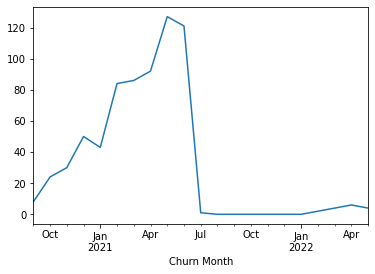

In [39]:
### monthly number of customers from recurring products 

from pandas.tseries.offsets import *
churn_from_recurring_df['Churn Month'] = churn_from_recurring_df['Last Active Month'] + DateOffset(months=+1)
churn_from_recurring_df.resample('M',on = 'Churn Month')['Contact_ID'].count().plot()

In [40]:
monthly_churn_recurring_client = churn_from_recurring_df.resample('M',on = 'Churn Month')['Contact_ID'].count()

### Total number of recurring product client per month

In [41]:
comp['Recurring revenue amount'].notnull().sum()

3633

In [43]:
temp = comp[comp['Recurring revenue amount'].notnull()].groupby('Associated Contact IDs').agg({'Deal ID':'count',
                                                                                                'Recurring revenue amount':'sum',
                                                                                                'Recurring revenue inactive date':'max'
                                                                                           }).reset_index()
### number of existing recurring product client in May 
temp[(temp['Recurring revenue inactive date'] <'2021-06-01') & 
     (temp['Recurring revenue inactive date'] >='2021-05-01')]

,Associated Contact IDs,Deal ID,Recurring revenue amount,Recurring revenue inactive date
8,1102392,6,600.0,2021-05-23 17:00:00
9,1103339,9,63.0,2021-05-29 17:00:00
13,1106989,2,107.0,2021-05-12 17:00:00
14,1107391,2,107.0,2021-05-29 17:00:00
15,1108677,3,300.0,2021-05-13 17:00:00
...,...,...,...,...
1177,8816901,2,200.0,2021-05-30 17:00:00
1180,8859651,2,14.0,2021-05-31 17:00:00
1182,8886901,2,14.0,2021-05-31 17:00:00
1192,9002801,2,14.0,2021-05-23 17:00:00


(606.0, 618.0)

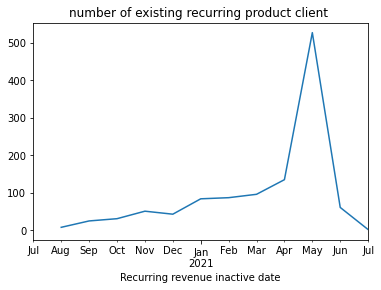

In [44]:
monthly_total_recurring_client = temp.resample('M',on = 'Recurring revenue inactive date')['Associated Contact IDs'].count()
temp.resample('M',on = 'Recurring revenue inactive date')['Associated Contact IDs'].count().plot()
plt.title('number of existing recurring product client ')
plt.xlim('2020-07-01','2021-07-01')

In [45]:
monthly_churn_recurring_client = pd.Series(0,index = ['2020-07-31 00:00:00']).add(monthly_churn_recurring_client,fill_value=0)



In [46]:
monthly_churn_rate_df = pd.DataFrame({'Date':monthly_total_recurring_client.index,
              'monthly_total_recurring_client_Count':monthly_total_recurring_client.values,
                'monthly_churn_recurring_client_Count':monthly_churn_recurring_client.values})

In [47]:
monthly_churn_rate_df['monthly_churn_rate'] = monthly_churn_rate_df['monthly_churn_recurring_client_Count']/monthly_churn_rate_df['monthly_total_recurring_client_Count']
monthly_churn_rate_df

,Date,monthly_total_recurring_client_Count,monthly_churn_recurring_client_Count,monthly_churn_rate
0,2020-08-31,8,0.0,0.000000
1,2020-09-30,25,8.0,0.320000
2,2020-10-31,31,24.0,0.774194
3,2020-11-30,51,30.0,0.588235
4,2020-12-31,43,50.0,1.162791
5,2021-01-31,84,43.0,0.511905
6,2021-02-28,87,84.0,0.965517
7,2021-03-31,96,86.0,0.895833
8,2021-04-30,135,92.0,0.681481
9,2021-05-31,527,127.0,0.240987


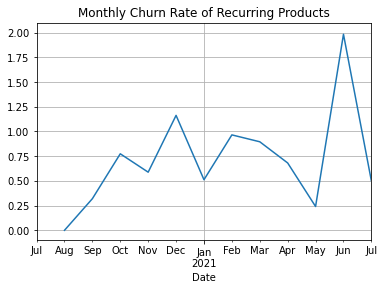

In [48]:
monthly_churn_rate_df.resample('M',on = 'Date')['monthly_churn_rate'].sum().plot()
plt.title('Monthly Churn Rate of Recurring Products')
plt.xlim('2020-07-01','2021-07-01')
plt.grid()

### Churn rate for non-recurring products

### Churn Prediction

## Calculate Customer Lifetime Value

### Average duration that a customer staying with us